<a href="https://www.kaggle.com/code/andrey36912/notebook83cce240c5?scriptVersionId=192909530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [239]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exam-1/data.csv


In [240]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import joblib

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [241]:
df = pd.read_csv('/kaggle/input/exam-1/data.csv')
     

In [242]:
print(df.head())

   Unnamed: 0  case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0           0        1              8                  c                   3   
1           1        2              2                  c                   5   
2           2        3             10                  e                   1   
3           3        4             26                  b                   2   
4           4        5             26                  b                   2   

  Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                    Z                                  3  radiotherapy   
1                    Z                                  2  radiotherapy   
2                    X                                  2    anesthesia   
3                    Y                                  2  radiotherapy   
4                    Y                                  2  radiotherapy   

  Ward_Type Ward_Facility_Code  ...  patientid  City_Code_Patient  \

In [243]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         318438 non-null  int64  
 1   case_id                            318438 non-null  int64  
 2   Hospital_code                      318438 non-null  int64  
 3   Hospital_type_code                 318438 non-null  object 
 4   City_Code_Hospital                 318438 non-null  int64  
 5   Hospital_region_code               318438 non-null  object 
 6   Available Extra Rooms in Hospital  318438 non-null  int64  
 7   Department                         318438 non-null  object 
 8   Ward_Type                          318438 non-null  object 
 9   Ward_Facility_Code                 318438 non-null  object 
 10  Bed Grade                          318325 non-null  float64
 11  patientid                          3184

In [244]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Числові ознаки:", numerical_features)
print("Категоріальні ознаки:", categorical_features)

Числові ознаки: ['Unnamed: 0', 'case_id', 'Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit', 'doctorid', 'country_code']
Категоріальні ознаки: ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']


In [245]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                                0
case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               113
patientid                                 0
City_Code_Patient                      4532
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                      0
doctorid                             316012
country_code                              0
dtype: int64


In [246]:
for feature in numerical_features:
    df[feature] = df[feature].fillna(df[feature].median())

for feature in categorical_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])


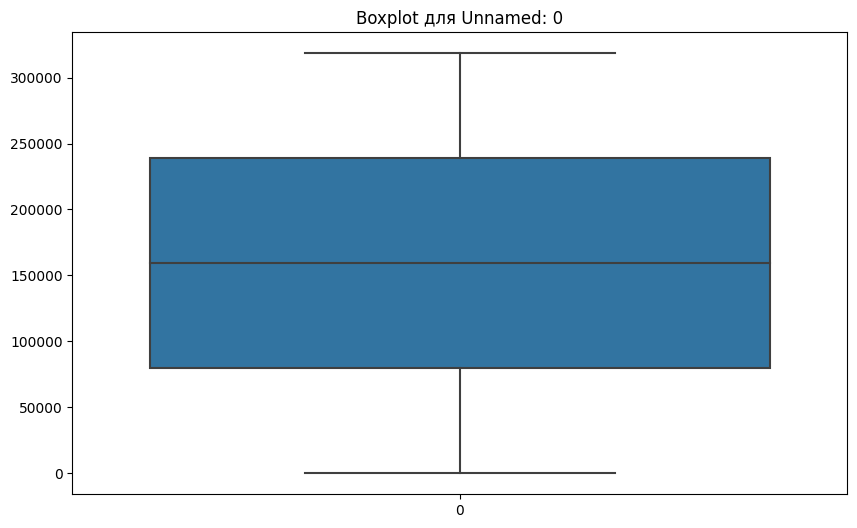

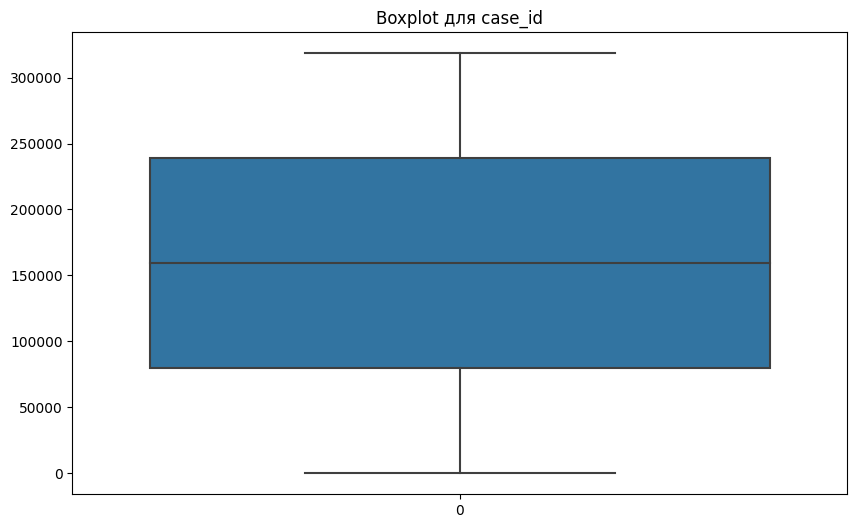

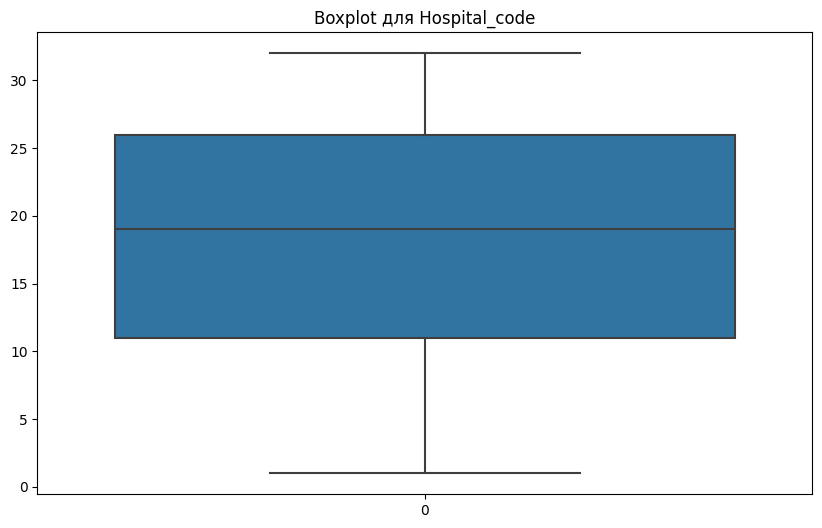

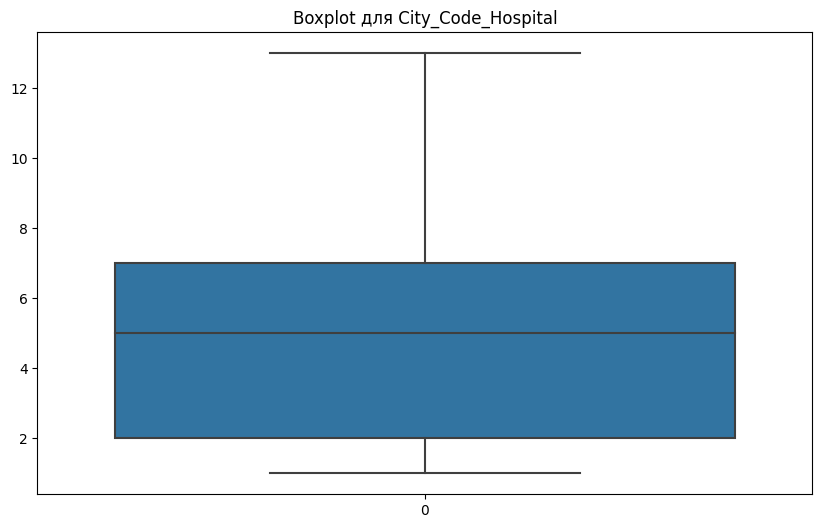

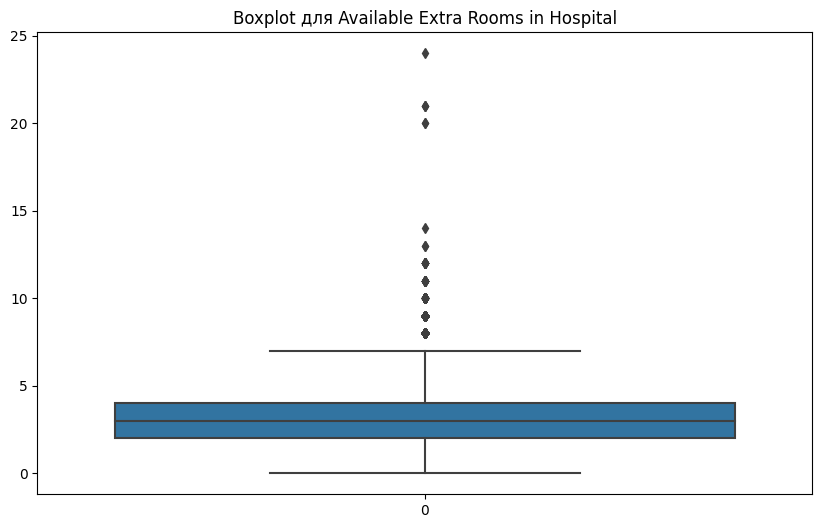

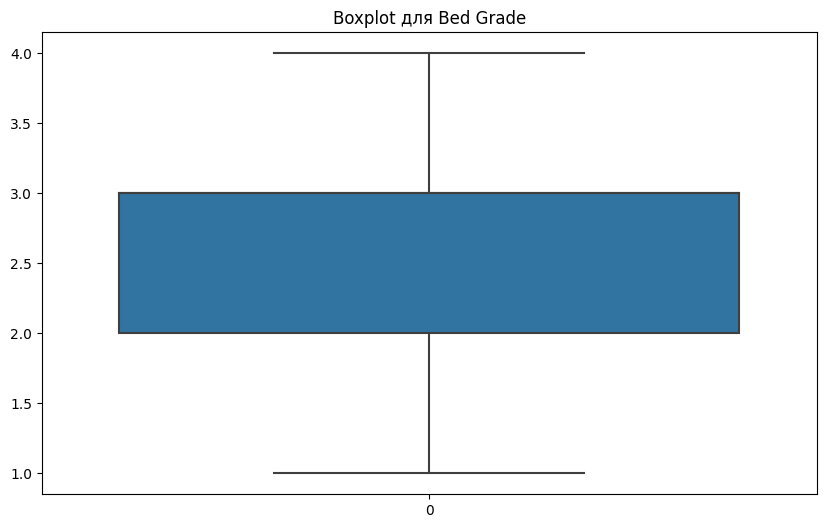

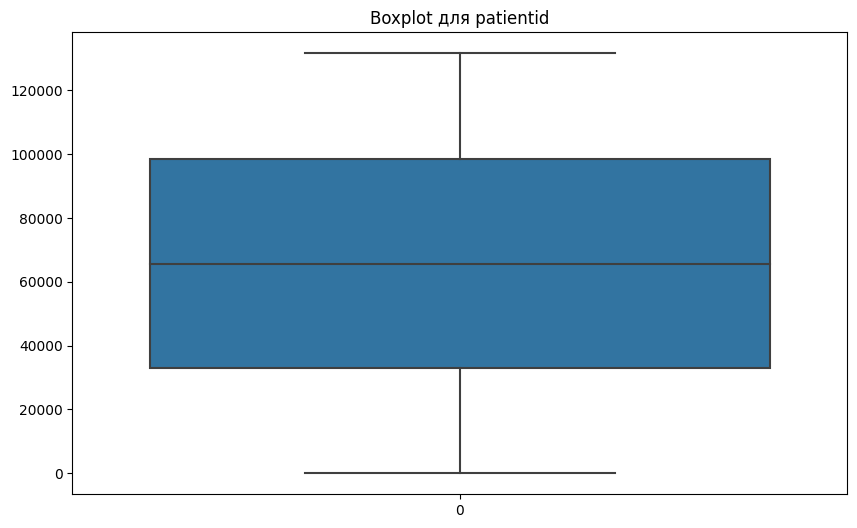

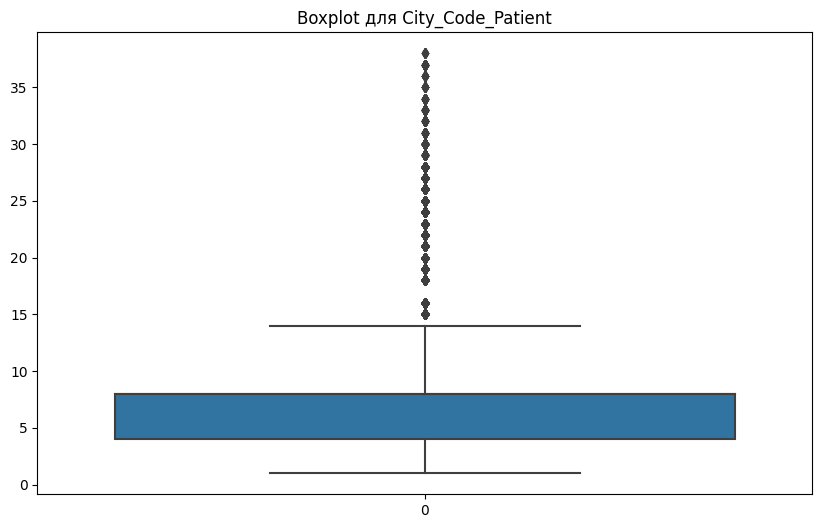

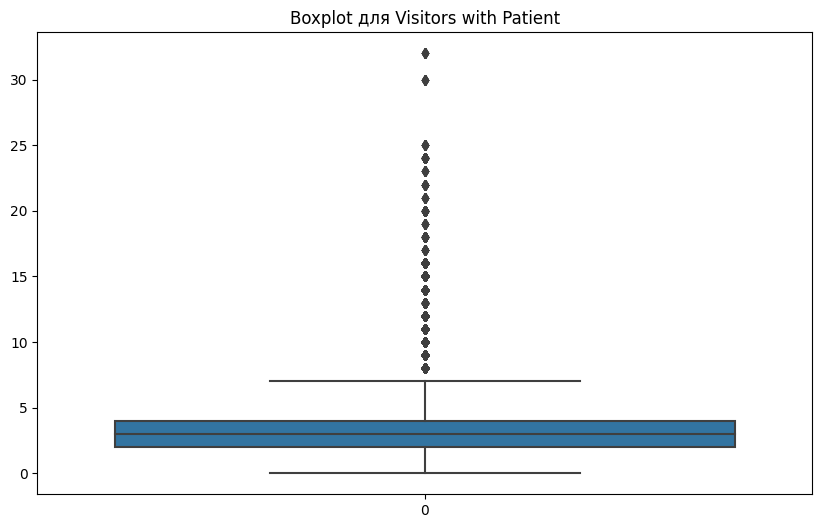

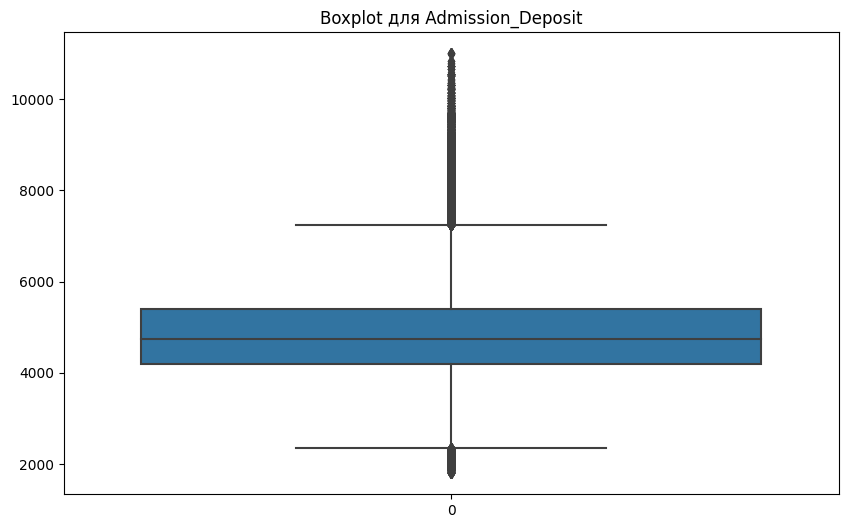

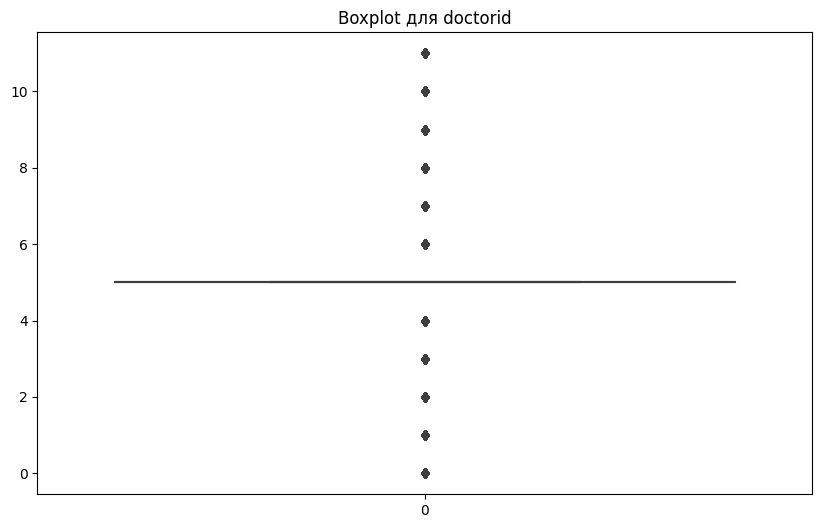

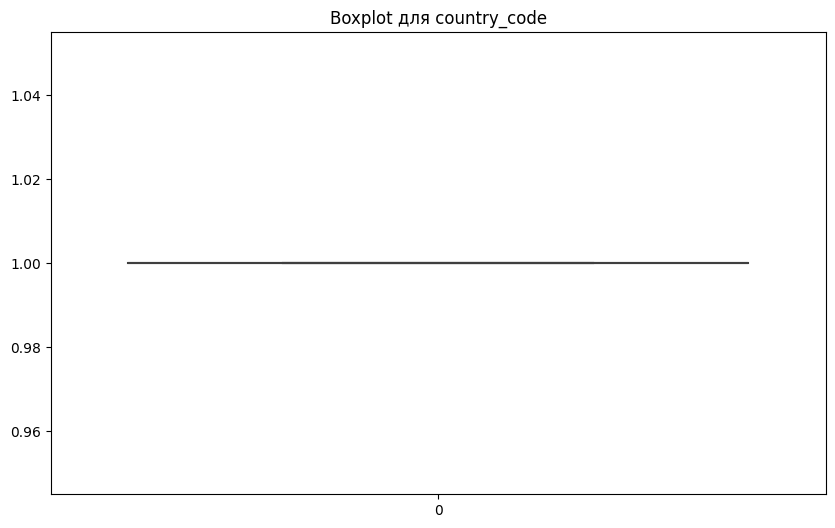

Розмір даних після видалення викидів: (270882, 21)


In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[feature])
    plt.title(f'Boxplot для {feature}')
    plt.show()

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Розмір даних після видалення викидів:", df_cleaned.shape)


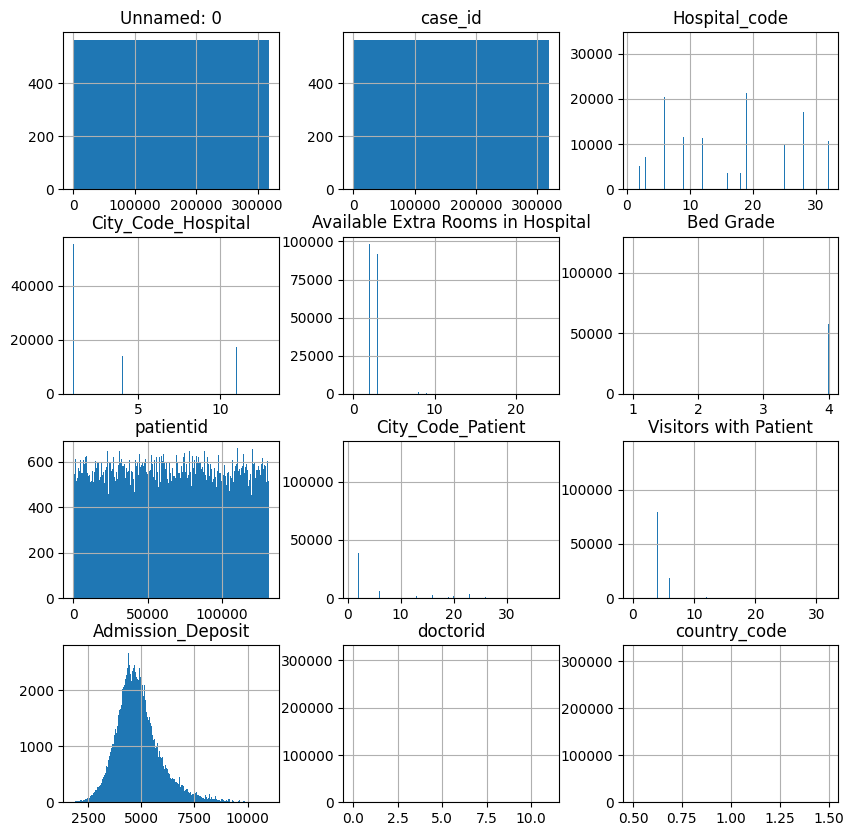

In [248]:
import math


n_bins = int(math.sqrt(len(df)))

df[numerical_features].hist(bins=n_bins, figsize=(10, 10))
plt.show()

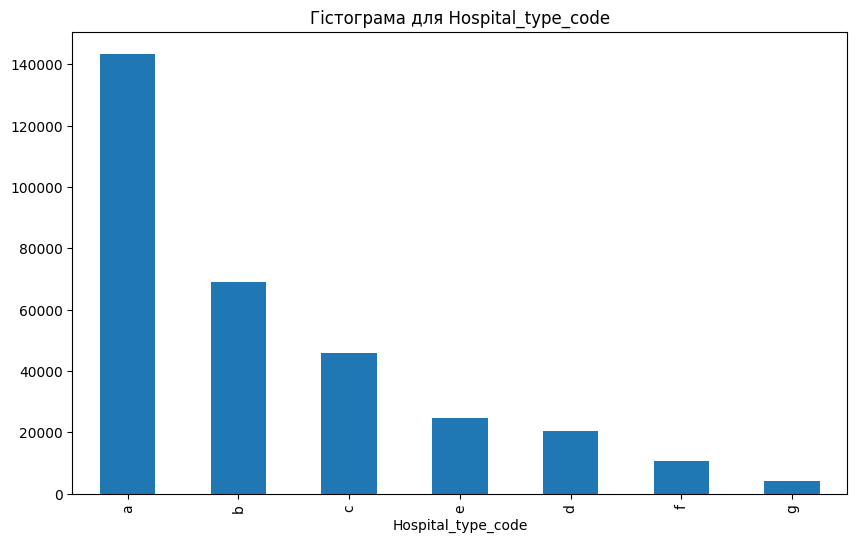

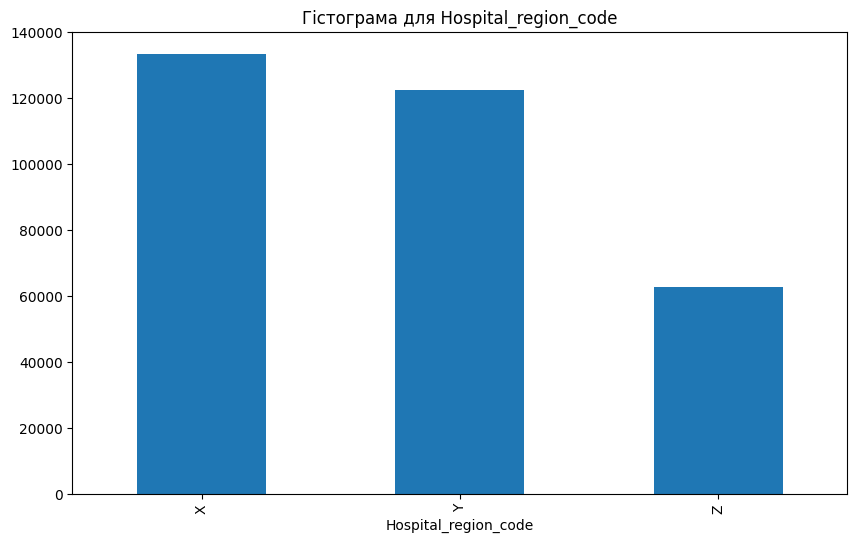

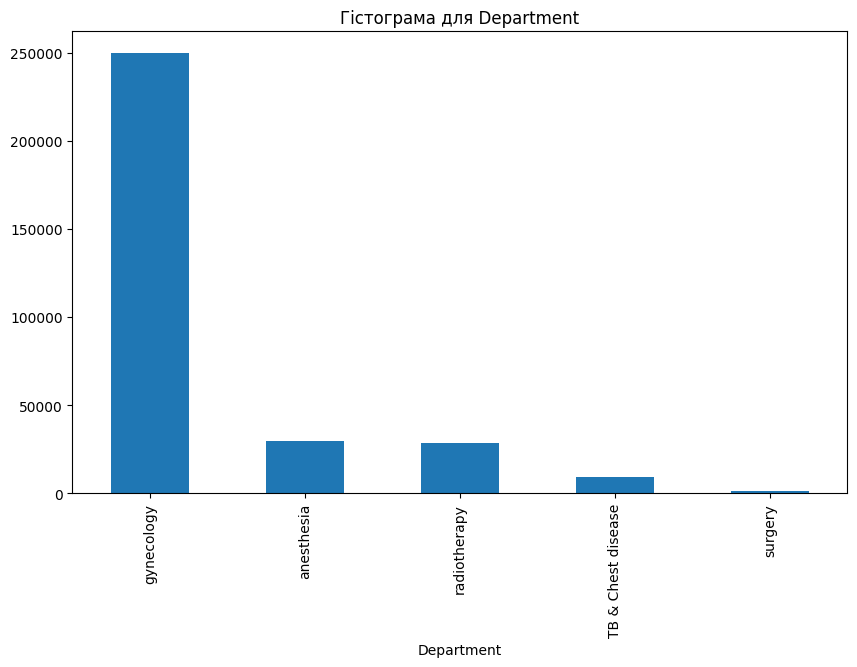

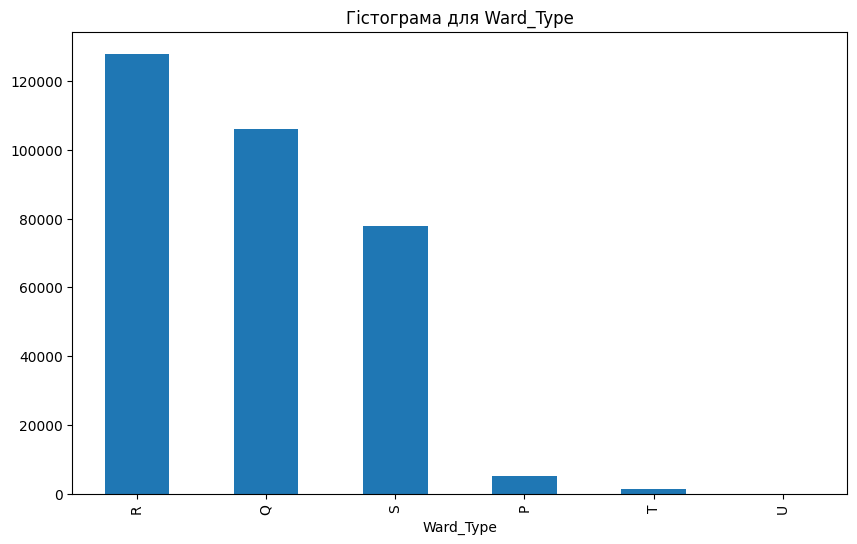

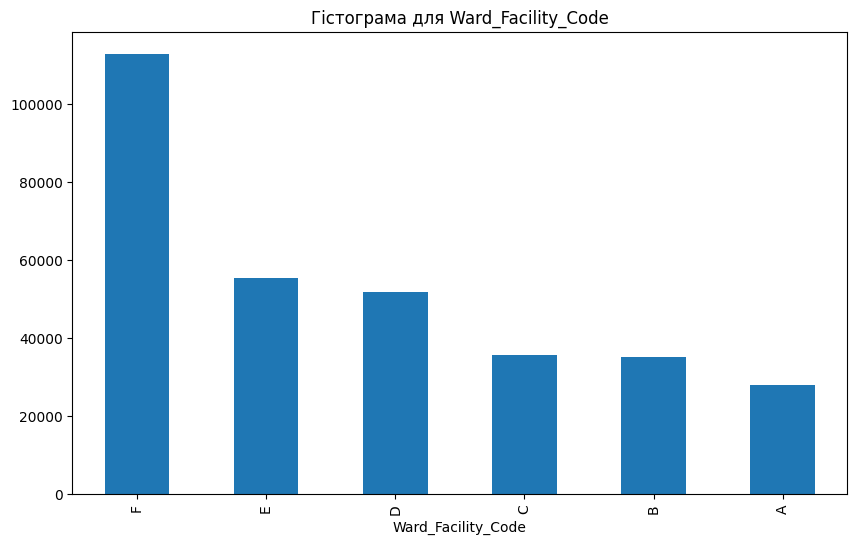

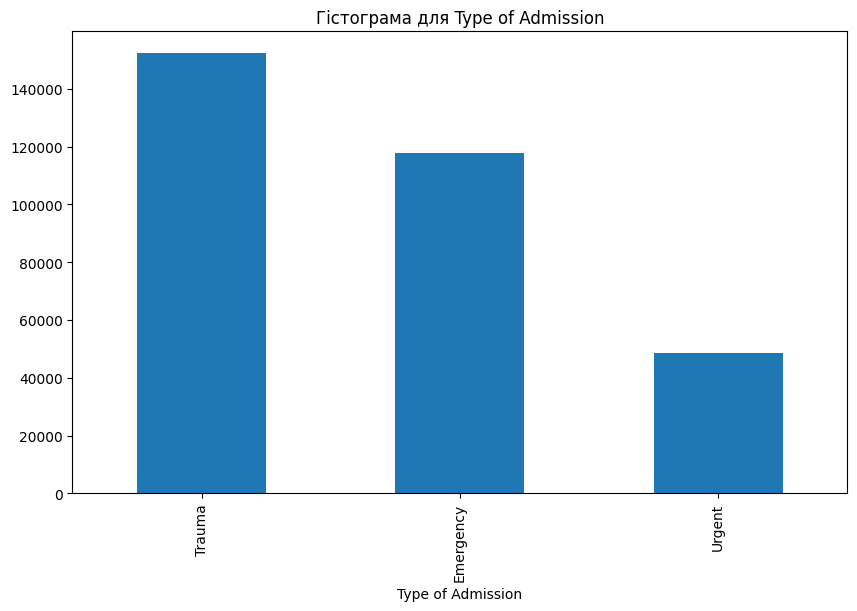

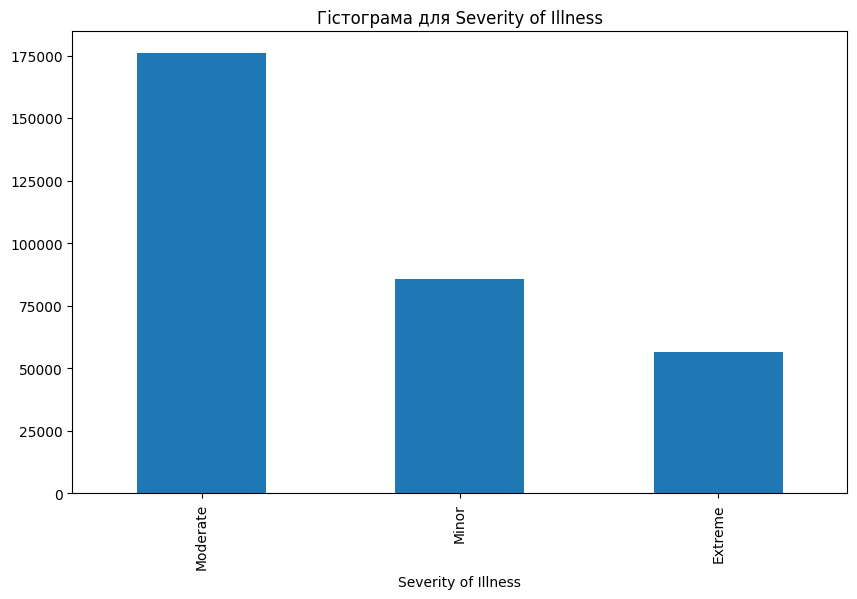

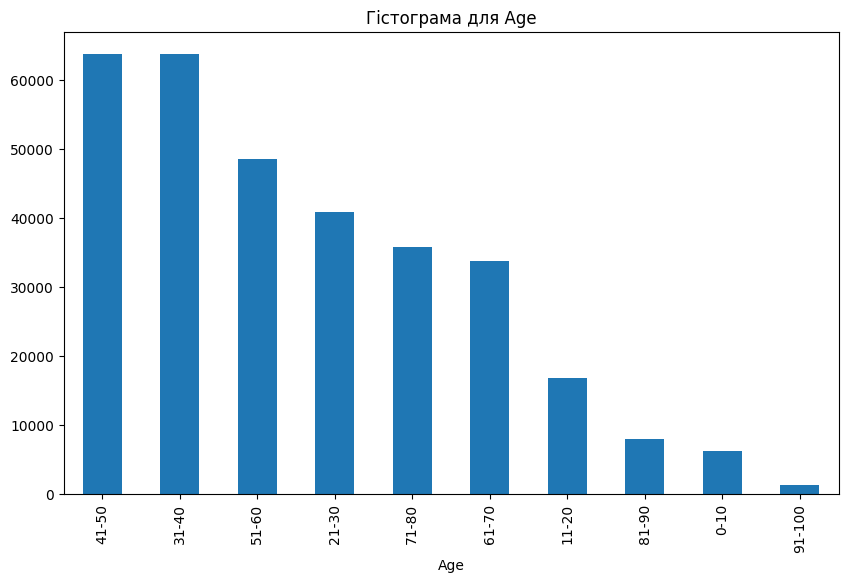

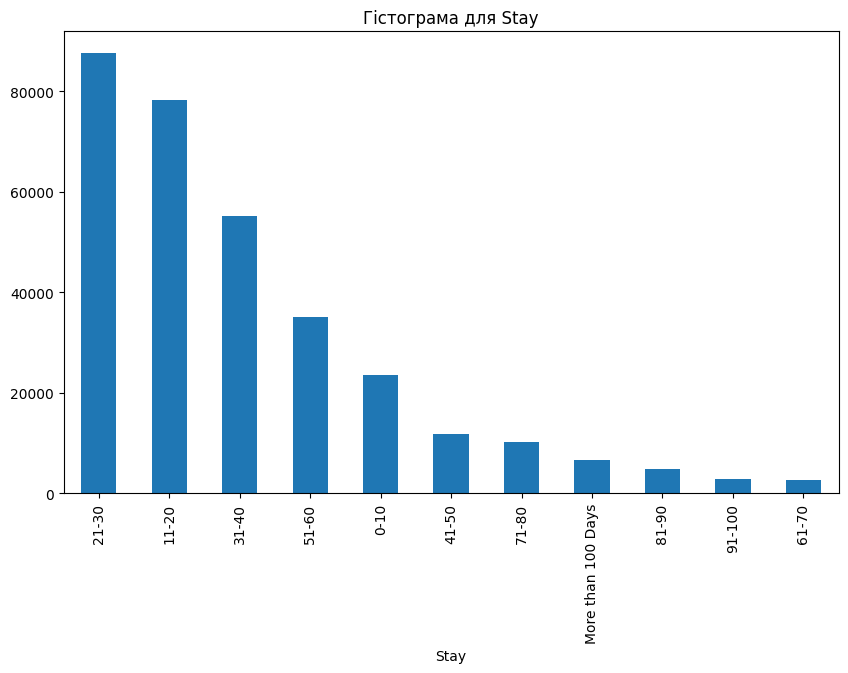

In [249]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Гістограма для {feature}')
    plt.show()


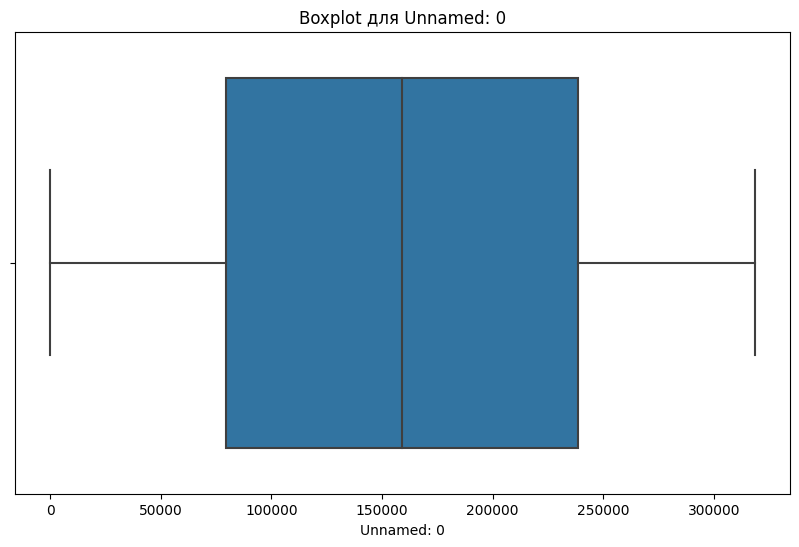

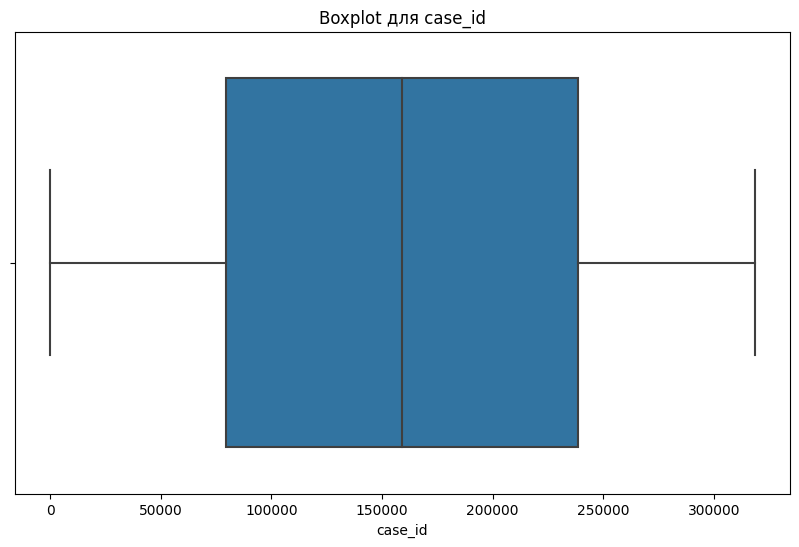

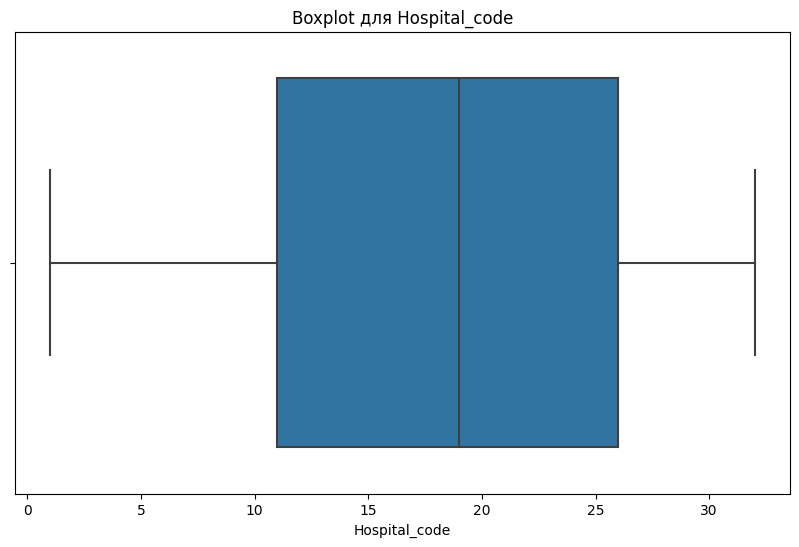

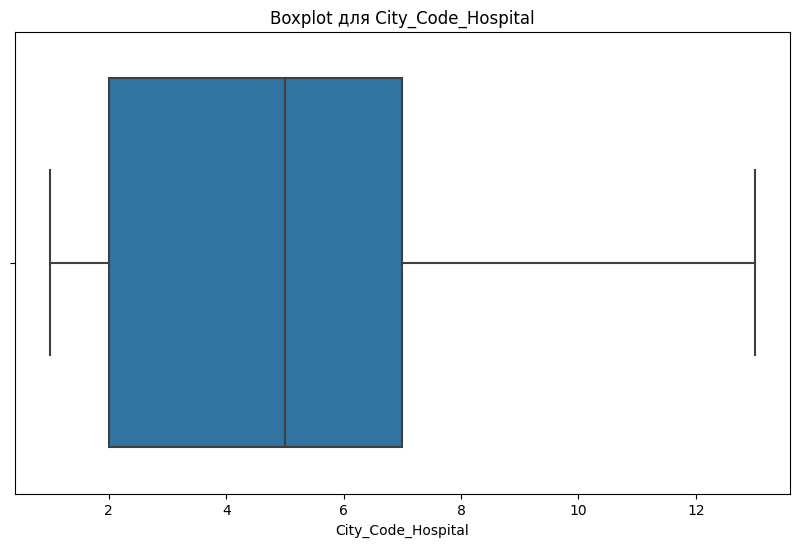

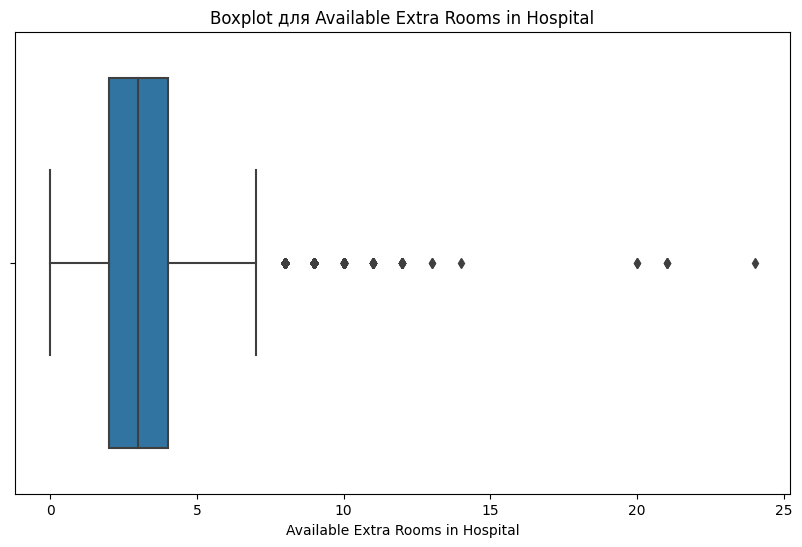

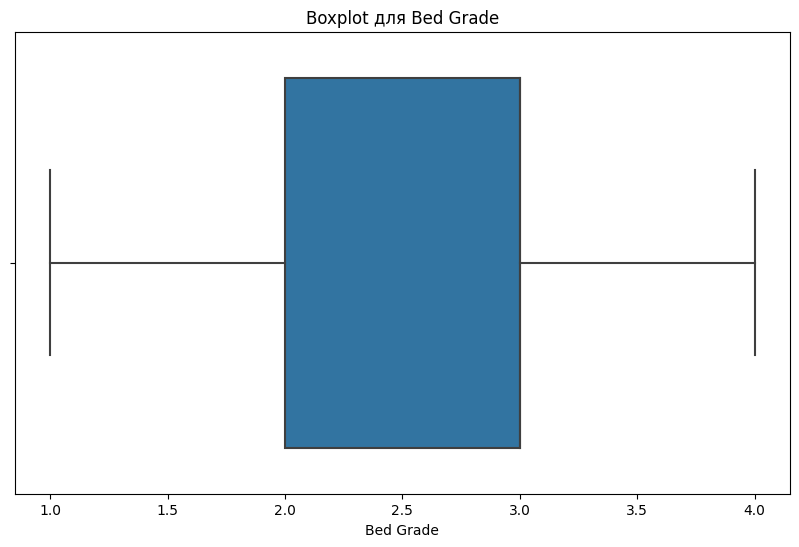

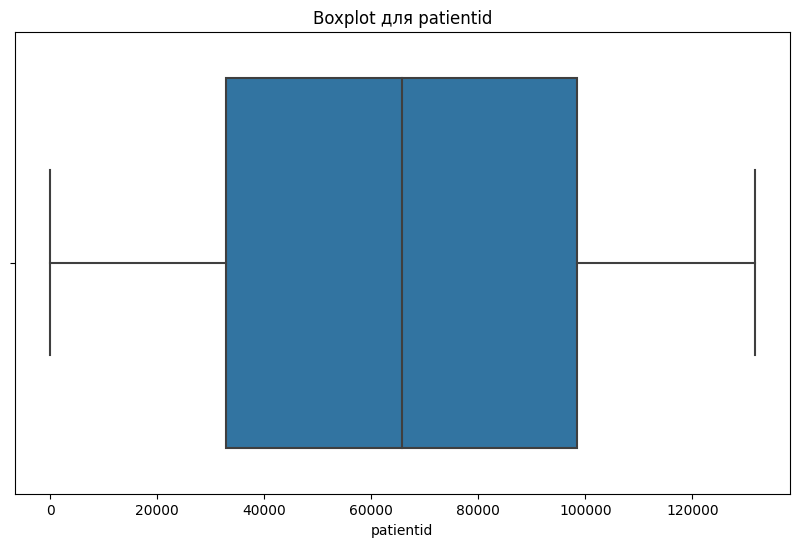

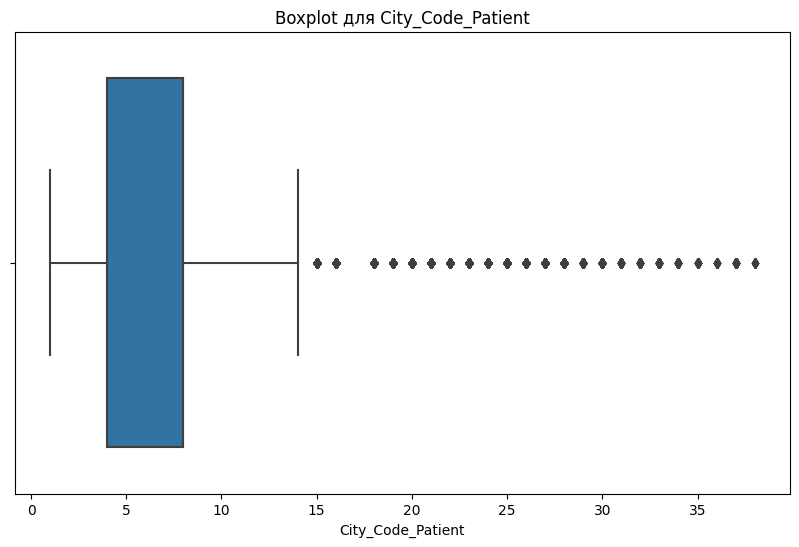

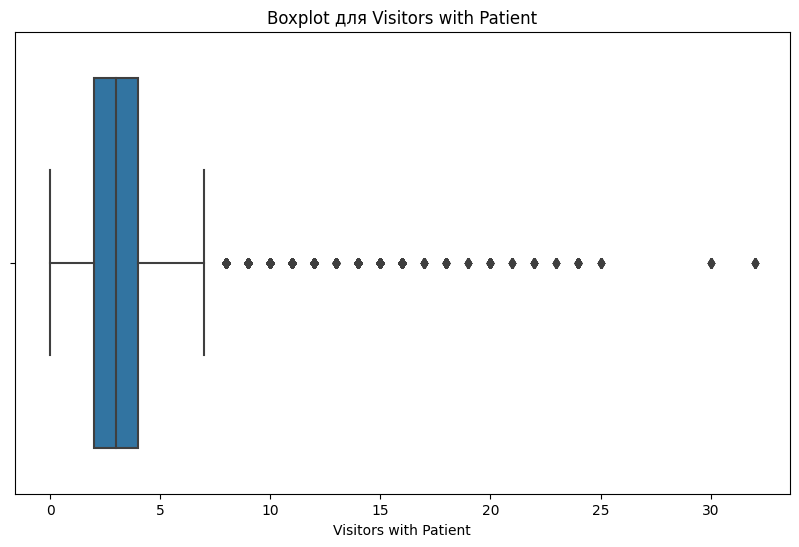

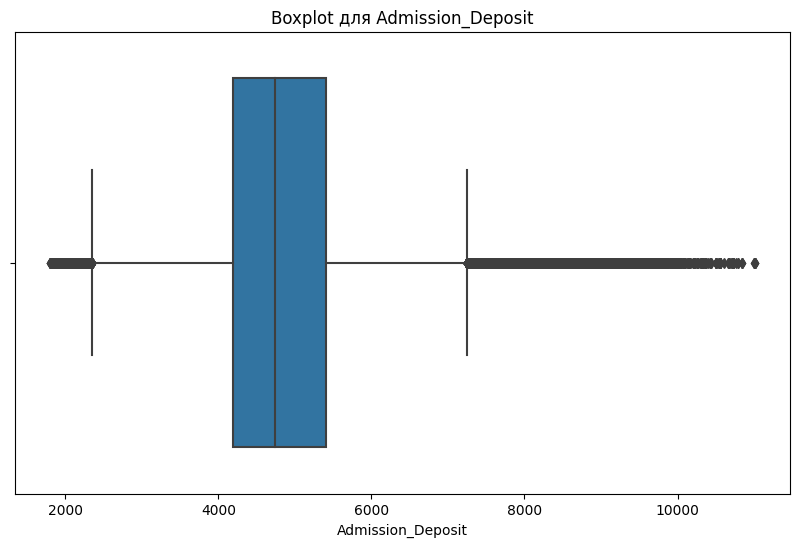

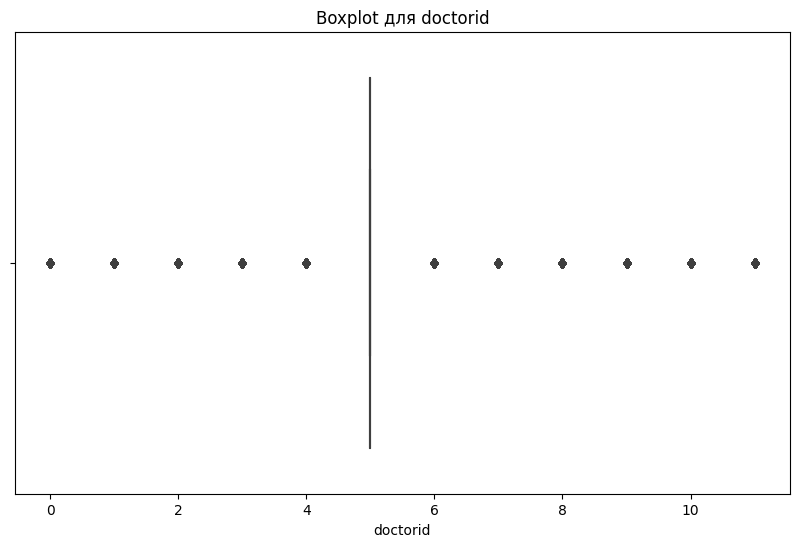

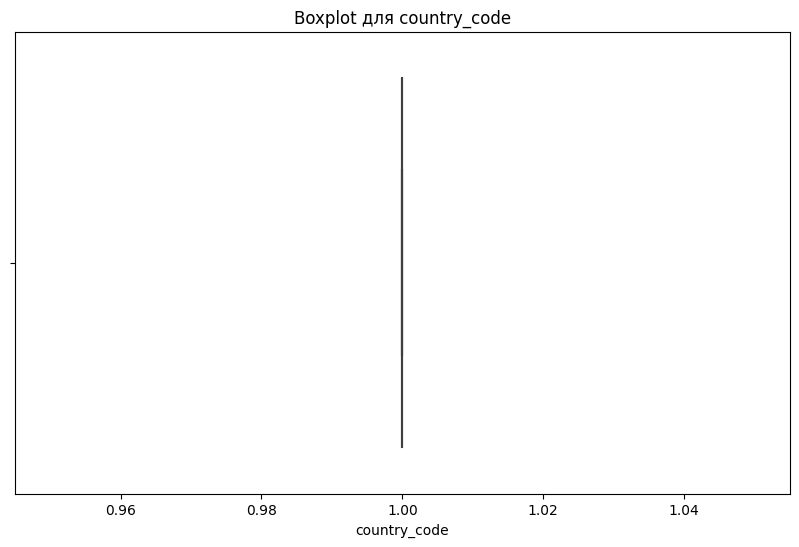

In [250]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, data=df)
    plt.title(f'Boxplot для {feature}')
    plt.show()

In [251]:

def calculate_mean_stay(stay):
    try:
        ranges = stay.split('-')
        # Якщо діапазон складається з двох чисел, розрахувати середнє
        if len(ranges) == 2:
            return (int(ranges[0]) + int(ranges[1])) / 2
        # Якщо значення не є діапазоном, обробити відповідно (наприклад, ">50" або "<1")
        elif stay.startswith('>'):
            return int(ranges[0].replace('>', ''))  # Для значень на кшталт '>50'
        elif stay.startswith('<'):
            return int(ranges[0].replace('<', ''))  # Для значень на кшталт '<1'
        else:
            return None  # Якщо значення не підпадає під жоден з форматів
    except Exception as e:
        print(f"Error processing stay value {stay}: {e}")
        return None

df['Stay_Days'] = df['Stay'].apply(calculate_mean_stay)


In [252]:
print("Количество пропущених значень в y:", y.isnull().sum())

Количество пропущених значень в y: 0


In [253]:
X = X[~y.isnull()]
y = y.dropna()

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [255]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [256]:
 numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [257]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [258]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [259]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Unnamed: 0', 'case_id',
                                                   'Hospital_code',
                                                   'City_Code_Hospital',
                                                   'Available Extra Rooms in '
                                                   'Hospital',
                                                   'Bed Grade', 'patientid',
                                                   'City_Code_Patient',
                                                   'Visitors with Patient',
                                                   'Admission_Deposit',
                                                   'doctorid',
                                                   'country_code']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Hospital_type_code',
                                                   'Hospital_region_code',
                                                   'Department', 'Ward_Type',
                                                   'Ward_Facility_Code',
                                                   'Type of Admission',
                                                   'Severity of Illness',
                                                   'Age'])])),
                ('regressor', LinearRegression())])

In [260]:
joblib.dump(model, 'hospital_stay_predictor.pkl')

['hospital_stay_predictor.pkl']

In [261]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 239.30759040918926
R^2 Score: 0.3324969044007826
